In [761]:
import numpy as np
from random import sample

In [792]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the possible sports grade list
GRADES_LIST = [['4'],['4+'],['5'],['5+']]+[[i+l,i+l+'+'] for i in ['6','7'] for l in ['a','b','c']]
GRADES_LIST = [val for sublist in GRADES_LIST for val in sublist]
GRADES_COLORS = [np.array(['g']*4+['orange']*4+['r']*4+['k']*(len(GRADES_LIST)-12))]  # Format needed to use as color list in pandas 

class Crag():
    '''This class covers *crag* objects, the cliff which houses the routes.
    
    Attributes:
        name
        latitude
        longitude
        rock_type
        route_list  - Adjusted automatically by creating a new route.
        route_count - Adjusted automatically by creating a new route.
    Methods:
        plot_crag_summary
        
        
    TODO:
        Simplify plot into number-grades
    '''
    def __init__(self, name, lat='Unknown', long='Unknown', rock_type='Unknown'):
        '''Initialise the object'''
        self.name = name
        self.lat  = lat
        self.long = long
        self.rock_type = rock_type
        self.route_dict = {}
        self.route_count = 0
        
    def plot_crag_summary(self):
        '''This creates a histogram of the grades at this crag and plots it
        
        Args:
            None
        Returns:
            None
        '''
        # Create df from GRADE_LIST
        grade_df = pd.DataFrame(GRADES_LIST).set_index(0)
        grade_df['count']=0

        # Add counts into it
        grade_counts = pd.Series(item[1].grade for item in self.route_dict.items()).value_counts()

        for i in grade_counts.items():
            grade_df.loc[i[0],'count']=i[1]

        # Plot
        fig,ax = plt.subplots(1,1)
        grade_df.plot(kind='bar', color=GRADES_COLORS, ax=ax, width = 1)
        
        # Formatting
        ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        ax.legend().set_visible(False)
        ax.set_yticks([])
        ax.set_xlabel('')
        plt.tick_params(axis='x', top=False) 
        plt.box(on=None)
        
    def __repr__(self):
        '''This magic method defines how Crag objects present themselves'''
        return 'Name: {} | Location: {},{}'.format(self.name,self.lat,self.long)
    
        

In [793]:
class Route():
    '''This class covers *route* objects, the individual routes at each crag.
    Attributes:
        name   (str)
        crag   (Crag)  - Note, this is a crag object, not a string
        height (float) - height of route in metres
        grade  (str)
        bolts  (int)   - Number of bolts on the route
        notes  (str)   - Optional free text description of route
    Methods:
        add_to_crag()  - Appends this route to the crag
        
    TODO: Data validation to check if grade is in accepted list
    '''
    def __init__(self, name, crag, height, grade, bolts='Unknown', notes=''):
        '''Initialise route and add to crag, iff crag doesn't exist - create it'''
        self.name = name
        self.crag = crag
        self.height = height
        self.grade = grade
        self.bolts = bolts
        self.notes = notes
        self._add_to_crag() # Add this new route the associated crag
        
    def _add_to_crag(self):
        '''Adds this route to the associated crag object
        Args:
            None
        Returns:
            None
        '''
        self.crag.route_dict[self.name]=self
        
    def __repr__(self):
        '''This magic method defines how Route objects present themselves'''
        return 'Name: {} | Grade: {}'.format(self.name,self.grade)
            
            

In [955]:
from dateutil.relativedelta import relativedelta
from datetime import date

class Climber():
    '''This class covers the *climber* objects
    Attributes:
        name (str)
        climb_list (dict)
        personal_best (str)
        dob (date)            - Date of birth input Format 'DD/MM/YYYY'
    Methods:
        add_climb(Route)
        get_age()
        plot_progress()
        
    TODO: 
        Data validation on DOB input
        Data validation on attempt_type for add_climb()
    '''
    
    def __init__(self, name, dob):
        self.name = name
        self.dob = date(*list(map(int,dob.split('/')))[::-1]) # Split DOB, map to ints, and unpack into date function
        self.climb_list = {}
        
    def get_age(self):
        '''Calculates the climbers age from todays data and their DOB
        Args:
            None
        Returns:
            Int - Age in years
        '''
        return relativedelta(date.today(), self.dob).years
    
    def add_climb(self, route, date, best_attempt_type):
        '''Adds certain route to a climbers list of routes, including the attempt type
        Args:
            route - Route object that was attempted
            best_attempt_type - One of 'Flash', 'Top', 'Dogged', 'Attempt'
        Return:
            None
        '''
        self.climb_list[route.name+"|"+date] = [route, date, best_attempt_type]
        
    def plot_progress(self):
        '''This plots the route attempts through time
        Args:
            None
        Return:
            None
        '''
        plt.scatter()
     
    def __repr__(self):
        '''This magic method defines how Route objects present themselves'''
        return "Name: {}, Climbs: {}".format(self.name, len(self.climb_list))

In [956]:
paul = Climber('Paul','12/07/1990')

In [957]:
# One week
paul.add_climb(routes[0],'02/06/2019','Flash')
paul.add_climb(routes[1],'02/06/2019','Attempt')
paul.add_climb(routes[2],'02/06/2019','Dogged')
# Next week
paul.add_climb(routes[1],'09/06/2019','Top')
paul.add_climb(routes[2],'09/06/2019','Top')

In [999]:
df = pd.DataFrame.from_dict(paul.climb_list, orient='index', columns=['route_object','date','attempt_type'])
df['grade']  = df.apply(lambda x: x.route_object.grade, axis=1)
df['marker'] = df.apply(lambda x: attempt_type_styles[x.attempt_type], axis=1)

ValueError: Unrecognized marker style 'marker'

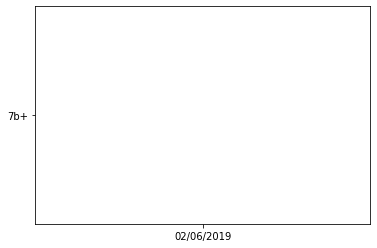

In [1000]:
df.plot(x='date',y='grade', kind='scatter', marker='marker', s = 60)

In [997]:
attempt_type_styles = {'Flash':'*','Top':'.','Dogged':'o','Attempt':'x'}
attempt_type_styles['Flash']

'*'

In [946]:
cheddar = Crag('Cheddar', 51.2864, 2.7603, 'Limestone')

In [947]:
# Add some example routes to the crag, with different grades
routes = []
for i in range(10):
    routes.append(Route('FunnyRouteName{}'.format(i),cheddar,12+i/5,sample(GRADES_LIST, 1)[0]))

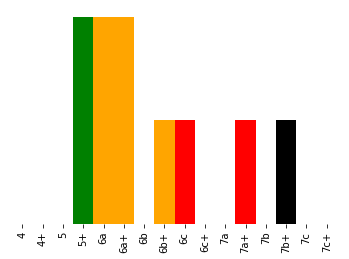

In [950]:
cheddar.plot_crag_summary()